### Nama: Millata Tasyakhanifa
### Username: millatasyaa
### Email: millatatasyakhanifa@gmail.com

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.layers import Dense, LSTM

## Read Dataset

In [3]:
df = pd.read_csv("/content/GOOG.csv", date_parser=True)

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
1,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
3,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
4,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620
...,...,...,...,...,...,...,...
4286,2021-08-30,2894.090088,2929.790039,2892.000000,2909.389893,2909.389893,845800
4287,2021-08-31,2917.689941,2922.239990,2900.000000,2909.239990,2909.239990,1337800
4288,2021-09-01,2913.000000,2936.409912,2912.290039,2916.840088,2916.840088,791200
4289,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4291 non-null   object 
 1   Open       4291 non-null   float64
 2   High       4291 non-null   float64
 3   Low        4291 non-null   float64
 4   Close      4291 non-null   float64
 5   Adj Close  4291 non-null   float64
 6   Volume     4291 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 234.8+ KB


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Plot Data

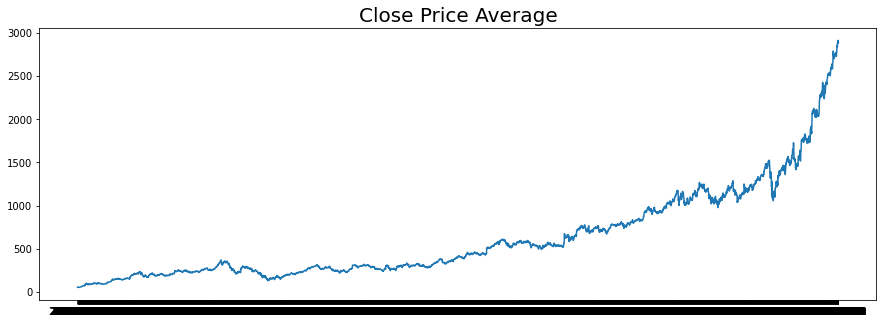

In [7]:
dates = df['Date'].values
close = df['Close'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, close)
plt.title('Close Price Average',
          fontsize=20);

## Drop Unnecessary Column

In [8]:
df = df.drop(['Date', 'Adj Close'], axis=1)

In [9]:
df

,Open,High,Low,Close,Volume
0,50.316402,54.336334,50.062355,53.952770,22942874
1,55.168217,56.528118,54.321388,54.495735,18342897
2,55.412300,55.591629,51.591621,52.239197,15319808
3,52.284027,53.798351,51.746044,52.802086,9232276
4,52.279045,53.773445,52.134586,53.753517,7128620
...,...,...,...,...,...
4286,2894.090088,2929.790039,2892.000000,2909.389893,845800
4287,2917.689941,2922.239990,2900.000000,2909.239990,1337800
4288,2913.000000,2936.409912,2912.290039,2916.840088,791200
4289,2918.989990,2926.500000,2882.129883,2884.379883,1092200


## Scaling Data 

In [10]:
min_max_scaler = MinMaxScaler()
df = min_max_scaler.fit_transform(df)

In [11]:
df

array([[3.15935064e-04, 1.26702642e-03, 2.71423928e-04, 1.44208948e-03,
        2.77885876e-01],
       [2.00671026e-03, 2.02655143e-03, 1.75903339e-03, 1.63147241e-03,
        2.22151352e-01],
       [2.09176904e-03, 1.70202729e-03, 8.05571134e-04, 8.44405502e-04,
        1.85522815e-01],
       ...,
       [9.97912590e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        9.49040107e-03],
       [1.00000000e+00, 9.96565891e-01, 9.89465559e-01, 9.88678075e-01,
        1.31373958e-02],
       [9.87430193e-01, 9.89995643e-01, 9.85263755e-01, 9.92556705e-01,
        1.14774680e-02]])

In [12]:
df.shape

(4291, 5)

In [13]:
X_train =[]
y_train = []

for i in range(30, df.shape[0]):
  X_train.append(df[i-30:i])
  y_train.append(df[i,0])

In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train.shape

(4261, 30, 5)

In [16]:
y_train.shape

(4261,)

## Build Model

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], 5)),
  tf.keras.layers.LSTM(60, activation="relu", return_sequences=True),
  tf.keras.layers.LSTM(80, activation="relu", return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            11200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 60)            26640     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 80)            45120     
_________________________________________________________________
dense (Dense)                (None, 30, 30)            2430      
_________________________________________________________________
dense_1 (Dense)              (None, 30, 10)            310       
_________________________________________________________________
dense_2 (Dense)              (None, 30, 1)             11        
Total params: 85,711
Trainable params: 85,711
Non-trainable params: 0
____________________________________________________

In [19]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.1):
      print("\nMAE dari model telah mencapai < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [21]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=200,
                    batch_size=128,
                    validation_split=0.2, # Validation set = 20% 
                    callbacks=[callbacks])

Epoch 1/200
27/27 [==============================] - 8s 156ms/step - loss: 0.0112 - mae: 0.1214 - val_loss: 0.1322 - val_mae: 0.4875
Epoch 2/200
27/27 [==============================] - 4s 130ms/step - loss: 0.0102 - mae: 0.1136 - val_loss: 0.1279 - val_mae: 0.4786
Epoch 3/200
27/27 [==============================] - 3s 128ms/step - loss: 0.0092 - mae: 0.1052 - val_loss: 0.1233 - val_mae: 0.4688
Epoch 4/200
27/27 [==============================] - 3s 129ms/step - loss: 0.0083 - mae: 0.0975 - val_loss: 0.1192 - val_mae: 0.4600

MAE dari model telah mencapai < 10% skala data


## Loss and MAE Plots During Training and Validation

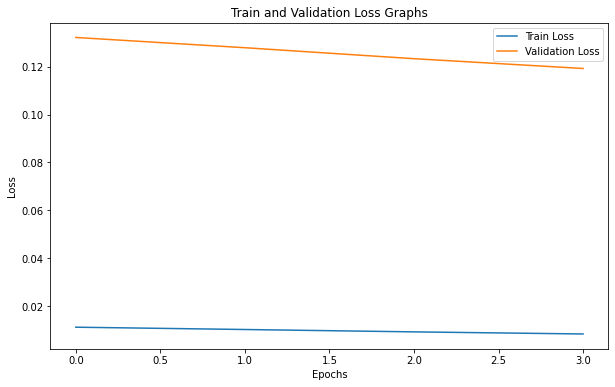

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Graphs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

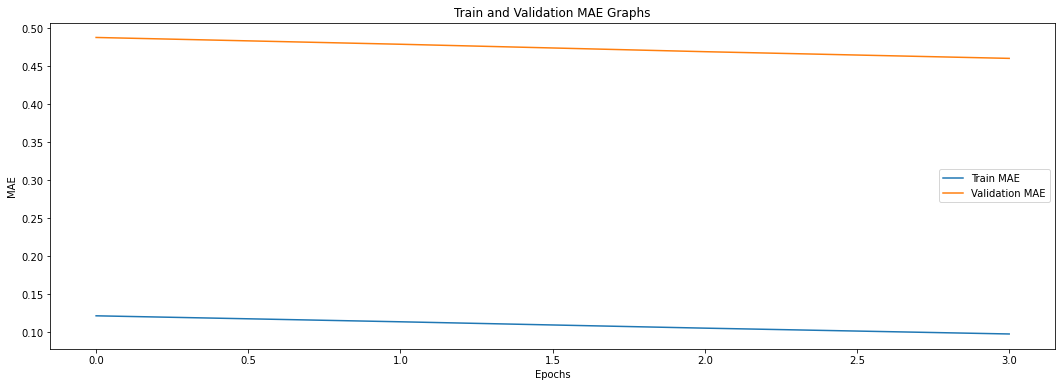

In [23]:
plt.figure(figsize=(18, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Train and Validation MAE Graphs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()